In [11]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
def ageNetWorthData():

    random.seed(42)
    numpy.random.seed(42)

    ages = []
    for ii in range(100):
        ages.append( random.randint(20,65) )
    net_worths = [ii * 6.25 + numpy.random.normal(scale=40.) for ii in ages]
    
    ### need massage list into a 2d numpy array to get it to work in LinearRegression
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    from sklearn.model_selection import train_test_split
    ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths)

    return ages_train, ages_test, net_worths_train, net_worths_test

In [13]:
# generate a model

ages_train, ages_test, net_worths_train, net_worths_test = ageNetWorthData()



from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(ages_train, net_worths_train)

### get Katie's net worth (she's 27)
### sklearn predictions are returned in an array, so you'll want to index into
### the output to get what you want, e.g. net_worth = predict([[27]])[0][0] (not
### exact syntax, the point is the [0] at the end). In addition, make sure the
### argument to your prediction function is in the expected format - if you get
### a warning about needing a 2d array for your data, a list of lists will be
### interpreted by sklearn as such (e.g. [[27]]).
km_net_worth = reg.predict([[27]])[0][0] ### fill in the line of code to get the right value

### get the slope
### again, you'll get a 2-D array, so stick the [0][0] at the end
slope = reg.coef_[0][0] ### fill in the line of code to get the right value

### get the intercept
### here you get a 1-D array, so stick [0] on the end to access
### the info we want
intercept = reg.intercept_[0] ### fill in the line of code to get the right value


### get the score on test data
test_score = reg.score(ages_test, net_worths_test) ### fill in the line of code to get the right value


### get the score on the training data
training_score = reg.score(ages_train, net_worths_train) ### fill in the line of code to get the right value



def submitFit():
    # all of the values in the returned dictionary are expected to be
    # numbers for the purpose of the grader.
    return {"networth":km_net_worth,
            "slope":slope,
            "intercept":intercept,
            "stats on test":test_score,
            "stats on training": training_score}

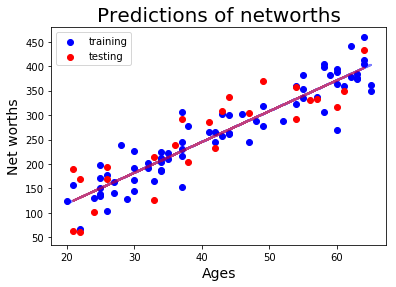

In [14]:
# visualizing regression
fig=plt.figure()

plt.scatter(ages_train, net_worths_train, color='blue', label="training")
plt.scatter(ages_test, net_worths_test, color='red', label="testing")
plt.plot(ages_train, reg.predict(ages_train), color = 'blue',linewidth=2,  alpha=0.5)
plt.plot(ages_test, reg.predict(ages_test), color = 'red', linewidth=2, alpha=0.5)

plt.title("Predictions of networths", fontsize=20)
plt.xlabel("Ages", fontsize=14)
plt.ylabel("Net worths", fontsize=14)
plt.legend(loc='upper left')
plt.show()  

### Calculate slope and intercept

In [17]:
import numpy as np

sleep = [5,6,7,8,10]
scores = [65,51,75,75,86]


def compute_regression(sleep,scores):

    #	First, compute the average amount of each list

    avg_sleep = np.mean(sleep)
    avg_scores = np.mean(scores)

    #	Then normalize the lists by subtracting the mean value from each entry

    normalized_sleep = [x - avg_sleep for x in sleep]
    normalized_scores = [x - avg_scores for x in scores]

    #	Compute the slope of the line by taking the sum over each student
    #	of the product of their normalized sleep times their normalized test score.
    #	Then divide this by the sum of squares of the normalized sleep times.

    slope = np.dot(normalized_sleep, normalized_scores) / np.sum([ x * x for x in normalized_sleep])

    #	Finally, We have a linear function of the form
    #	y - avg_y = slope * ( x - avg_x )
    #	Rewrite this function in the form
    #	y = m * x + b
    #	Then return the values m, b
    m = slope
    b = avg_scores - slope * avg_sleep
    
    return m,b


if __name__=="__main__":
    m,b = compute_regression(sleep,scores)
    print("Your linear model is y={}*x+{}".format(m,b))

Your linear model is y=5.513513513513513*x+30.70270270270271


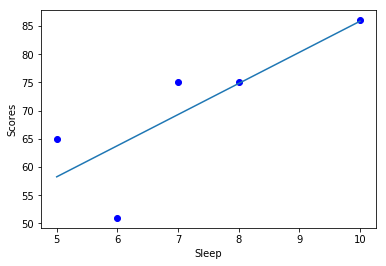

In [18]:
plt.scatter(sleep, scores, color='blue')

plt.plot(sleep, [(5.51351351351*x+30.7027027027) for x in sleep])
plt.xlabel('Sleep')
plt.ylabel('Scores')
plt.show()

### Limitation of a simple linear model

This is the limitation of extrapolating beyond the range of the data we have: we may get nonsensical answers, 
like infinite sleep leads to an infinitely better exam grade.

### One solution: polynomial regression

In [19]:
# use numpy ployfit function returns a vector of coefficients, highest power first
np.polyfit(sleep, scores, 2)

array([  0.43004418,  -0.97201767,  53.83210604])

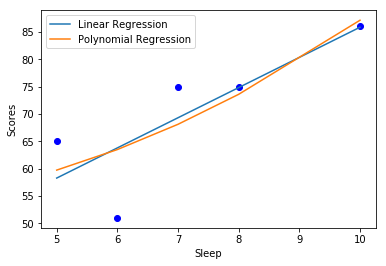

In [20]:
plt.scatter(sleep, scores, color='blue')

plt.plot(sleep, [(5.51351351351*x+30.7027027027) for x in sleep], label='Linear Regression')
plt.plot(sleep, [(0.43004418*x*x + -0.97201767*x+53.83210604) for x in sleep], label='Polynomial Regression')
plt.xlabel('Sleep')
plt.ylabel('Scores')

plt.legend(loc='upper left')
plt.show()

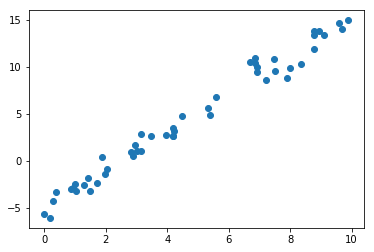

In [26]:
rng = np.random.RandomState(1)

x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)

plt.scatter(x, y)

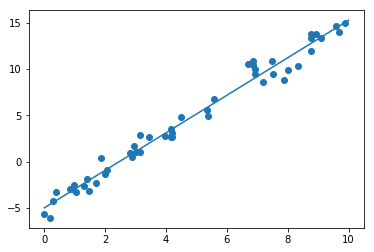

In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0,10,1000)  #Return evenly spaced numbers over a specified interval.
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [32]:
print(model.coef_[0])
print(model.intercept_)

2.02720881036
-4.99857708555


In [39]:
x = 10 * rng.rand(4,3)
y = 0.5 + np.dot(x, [1.5, -2., 1.3])

model.fit(x, y)
print(model.coef_)
print(model.intercept_)

[ 1.5 -2.   1.3]
0.5


In [44]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2,3,4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.]])

In [46]:
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

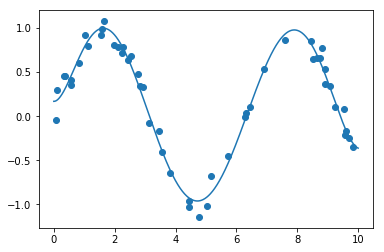

In [50]:
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, None]) # np.newaxis are same as None

plt.scatter(x, y)
plt.plot(xfit, yfit)

## Predict bicyclers by weather 

In [138]:
import pandas as pd
cnts = pd.read_csv('FremontBridge.csv', index_col = 'Date', parse_dates=True)
cnts.head(2)

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0


In [139]:
daily = cnts.resample('d').sum()
daily['total'] = daily.sum(axis=1)
daily_cnts = daily[['total']]
daily_cnts.head(2)

,total
Date,
2012-10-03,3521.0
2012-10-04,3475.0


In [140]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily_cnts[days[i]] = (daily_cnts.index.dayofweek == i).astype(float)
daily_cnts.head(2) 

C:\Users\jli\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [141]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2017')

daily_cnts = daily_cnts.join(pd.Series(1, index=holidays, name='holiday'))
daily_cnts['holiday'].fillna(0, inplace=True)
daily_cnts.tail(2) 

,total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2017-04-29,1358.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2017-04-30,1215.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [142]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily_cnts['daylight_hrs'] = list(map(hours_of_daylight, daily_cnts.index))
daily_cnts.tail(2) 

,total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs
Date,,,,,,,,,,
2017-04-29,1358.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,14.138418
2017-04-30,1215.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14.190158


In [143]:
weathers = pd.read_csv('weather.csv', index_col='DATE', parse_dates=True)
weathers.head(2)

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TAVG,TMAX,TMIN,AWND,WDF2,...,WT17,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.00,0.0,0.0,-9999,55,41,10.5,100,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.43,0.0,0.0,-9999,51,37,10.1,180,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999


In [144]:
weathers['TMIN'] = (weathers['TMIN'] - 32) * 5 /9
weathers['TMAX'] = (weathers['TMAX'] - 32) * 5 /9
weathers['Temp(C)'] = 0.5 * (weathers['TMIN'] + weathers['TMAX'])

weathers['dry day'] = (weathers['PRCP'] == 0).astype(int)

In [145]:
daily_cnts = daily_cnts.join(weathers[['SNWD','SNOW', 'PRCP', 'Temp(C)', 'dry day']])
daily_cnts.head(2)

,total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,SNWD,SNOW,PRCP,Temp(C),dry day
Date,,,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,0.0,0.0,13.333333,1
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,0.0,0.0,13.611111,1


In [146]:
daily_cnts.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp(C)','SNWD','SNOW']
y = daily_cnts['total']
X = daily_cnts[column_names]

In [147]:
print(y.size)
print(X.shape)

1671
(1671, 14)


In [148]:
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily_cnts['predicted'] = model.predict(X)

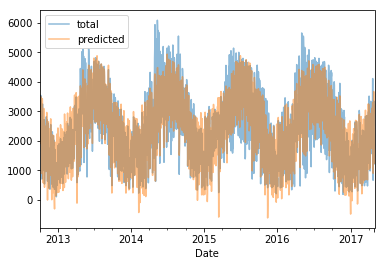

In [149]:
daily_cnts[['total', 'predicted']].plot(alpha=0.5);

In [150]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon              726.920148
Tue              860.602227
Wed              827.766745
Thu              699.779354
Fri              363.237112
Sat             -934.288992
Sun             -983.255250
holiday        -1144.359213
daylight_hrs     109.367655
PRCP            -675.334611
dry day          510.191575
Temp(C)           73.901950
SNWD            -206.485174
SNOW              89.585610
dtype: float64

In [151]:
from sklearn.utils import resample

np.random.seed(1)
err = np.std([model.fit(*resample(X,y)).coef_ for i in range(1000)], 0)

In [152]:
print(pd.DataFrame({'effect': params.round(0), 'error':err.round(0)}))

              effect  error
Mon            727.0   70.0
Tue            861.0   72.0
Wed            828.0   72.0
Thu            700.0   71.0
Fri            363.0   68.0
Sat           -934.0   68.0
Sun           -983.0   70.0
holiday      -1144.0  122.0
daylight_hrs   109.0    7.0
PRCP          -675.0   47.0
dry day        510.0   26.0
Temp(C)         74.0    3.0
SNWD          -206.0   97.0
SNOW            90.0  122.0
